# Insurance Claims- Fraud Detection

# Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Exploratory data analysis

In [4]:
#cheking dimention of dataset
df.shape

(1000, 40)

In [5]:
#cheking type of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

All column have integer data type except the column ERA so no need to encode the data

In [6]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#checking number of unique values in dataset
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
#Cheking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# we can see _c39 has all null values so we will remove it 
df.drop(['_c39'],axis=1)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [10]:
# replacing '?' with No info 
df=df.replace('?','No Info')

In [11]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

we can see this row has negative value so we will drop it

In [12]:
df.drop(df[df['umbrella_limit']==-1000000].index,inplace=True)

In [13]:
#converting  Incident date in to 3 columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

#dropping the column incident_date
df.drop(['incident_date'], axis=1)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,incident_Date,incident_Month,incident_Year
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,NaN,25,01,2015
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,NaN,21,01,2015
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,NaN,22,02,2015
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,NaN,10,01,2015
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,NaN,17,02,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,8720,61040,Honda,Accord,2006,N,NaN,22,02,2015
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,18080,72320,Volkswagen,Passat,2015,N,NaN,24,01,2015
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,7500,52500,Suburu,Impreza,1996,N,NaN,23,01,2015
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,5220,36540,Audi,A5,1998,N,NaN,26,02,2015


In [14]:
#converting policy_bind_date in to 3 columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

#dropping the column policy bind date
df.drop(['policy_bind_date'], axis=1)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,_c39,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,92x,2004,Y,NaN,25,01,2015,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,E400,2007,Y,NaN,21,01,2015,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,RAM,2007,N,NaN,22,02,2015,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Tahoe,2014,Y,NaN,10,01,2015,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,RSX,2009,N,NaN,17,02,2015,06,06,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,Accord,2006,N,NaN,22,02,2015,16,07,1991
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,Passat,2015,N,NaN,24,01,2015,05,01,2014
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,Impreza,1996,N,NaN,23,01,2015,17,02,2003
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,A5,1998,N,NaN,26,02,2015,18,11,2011


In [15]:
#also dropping other unneccesary columns
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [16]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,auto_model,auto_year,fraud_reported,_c39,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,MALE,MD,...,92x,2004,Y,NaN,25,01,2015,17,10,2014
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,MALE,MD,...,E400,2007,Y,NaN,21,01,2015,27,06,2006
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,...,RAM,2007,N,NaN,22,02,2015,06,09,2000
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,...,Tahoe,2014,Y,NaN,10,01,2015,25,05,1990
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,MALE,Associate,...,RSX,2009,N,NaN,17,02,2015,06,06,2014


In [17]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

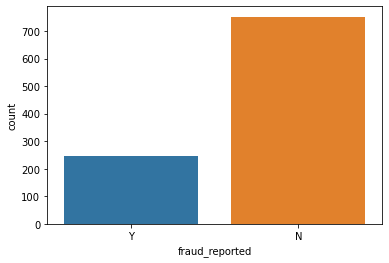

In [18]:
sns.countplot(df['fraud_reported'])

as we can see there are very few fraud repored

also the dataset is imbalnced

In [19]:
cor = df.corr()
cor

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922141,0.027553,0.004785,0.016146,0.007032,0.019559,0.070522,0.015319,-0.009328,0.058708,0.061106,0.065185,0.033613,0.059979,0.000763,NaN
age,0.922141,1.000000,0.029553,0.014293,0.018441,-0.006777,0.007052,0.087103,0.022386,-0.015286,0.052513,0.069427,0.075451,0.060350,0.062131,0.001862,NaN
policy_deductable,0.027553,0.029553,1.000000,-0.002897,0.009927,0.034305,-0.022574,0.061173,0.050401,-0.024055,0.066224,0.024516,0.039370,0.067063,0.006967,0.024570,NaN
policy_annual_premium,0.004785,0.014293,-0.002897,1.000000,-0.005941,-0.013441,0.023237,-0.001644,-0.045732,0.027209,0.002480,0.008576,-0.017712,-0.012359,0.019728,-0.048775,NaN
umbrella_limit,0.016146,0.018441,0.009927,-0.005941,1.000000,-0.048134,-0.023202,-0.023088,-0.022041,0.021659,-0.007144,-0.038972,-0.045220,-0.021998,-0.037166,0.008520,NaN
capital-gains,0.007032,-0.006777,0.034305,-0.013441,-0.048134,1.000000,-0.046083,-0.016236,0.060944,0.054799,-0.018056,0.017425,0.026154,0.001043,0.017327,0.030078,NaN
capital-loss,0.019559,0.007052,-0.022574,0.023237,-0.023202,-0.046083,1.000000,-0.025252,-0.014120,-0.023290,-0.040934,-0.037622,-0.046303,-0.024850,-0.034271,-0.055258,NaN
incident_hour_of_the_day,0.070522,0.087103,0.061173,-0.001644,-0.023088,-0.016236,-0.025252,1.000000,0.120999,-0.034353,0.006613,0.217668,0.165730,0.179511,0.215596,0.021689,NaN
number_of_vehicles_involved,0.015319,0.022386,0.050401,-0.045732,-0.022041,0.060944,-0.014120,0.120999,1.000000,0.013046,-0.015037,0.276005,0.224923,0.221272,0.271176,0.033355,NaN
bodily_injuries,-0.009328,-0.015286,-0.024055,0.027209,0.021659,0.054799,-0.023290,-0.034353,0.013046,1.000000,-0.006142,0.049090,0.047635,0.042308,0.045502,-0.022403,NaN


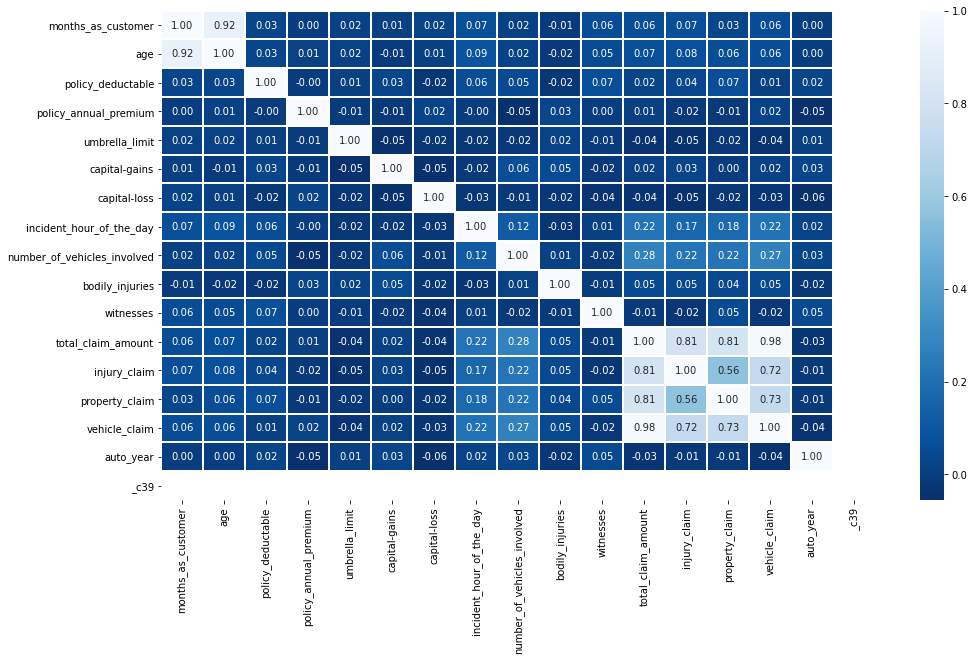

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

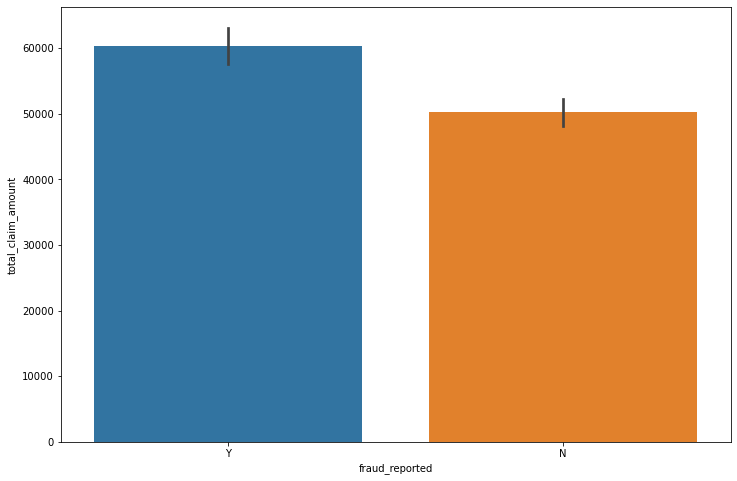

In [21]:
#cheking total_claim_amount and fraud_reported
plt.figure(figsize=(12,8))
sns.barplot(y='total_claim_amount',x='fraud_reported',data=df)

 most of fraud found where total claim amount is 60000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

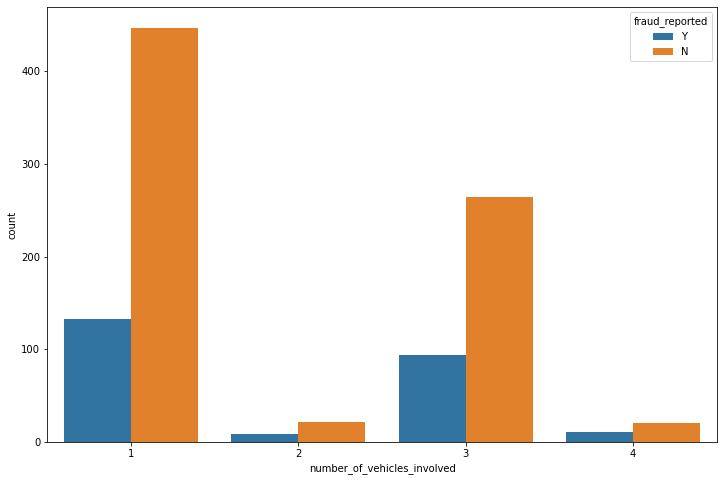

In [22]:
# cheking number_of_vehicles_involved and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

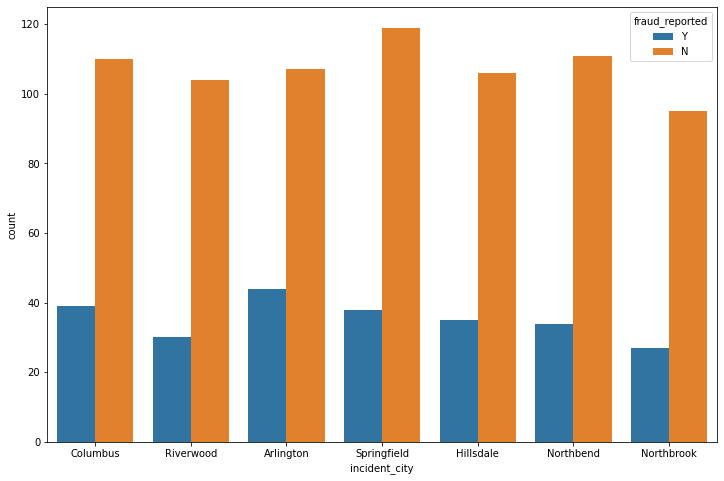

In [23]:
# cheking incident_city and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_city',hue='fraud_reported', data=df)

in all cities fraud reported count is almost same

<AxesSubplot:xlabel='incident_state', ylabel='count'>

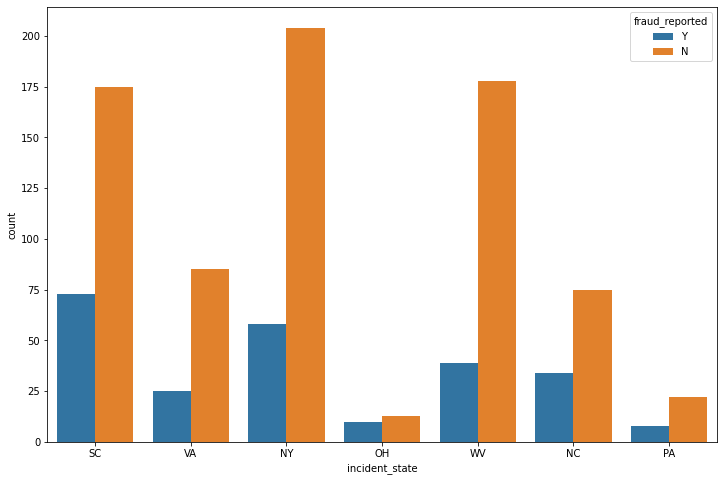

In [24]:
# cheking incident_state and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_state',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

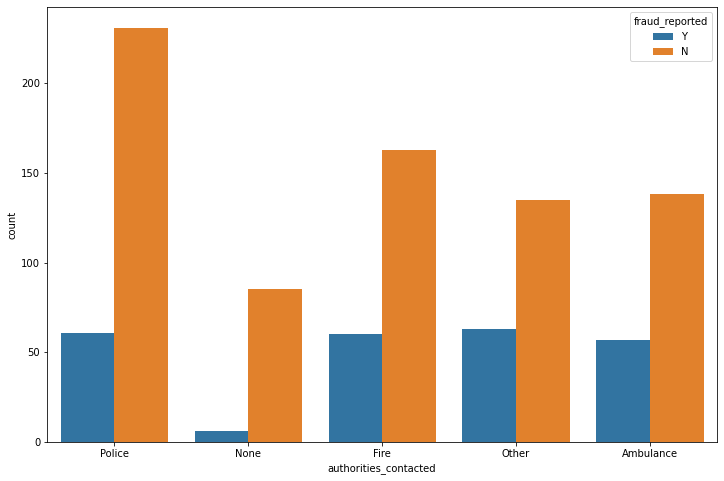

In [25]:
# cheking authorities_contacted and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='authorities_contacted',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

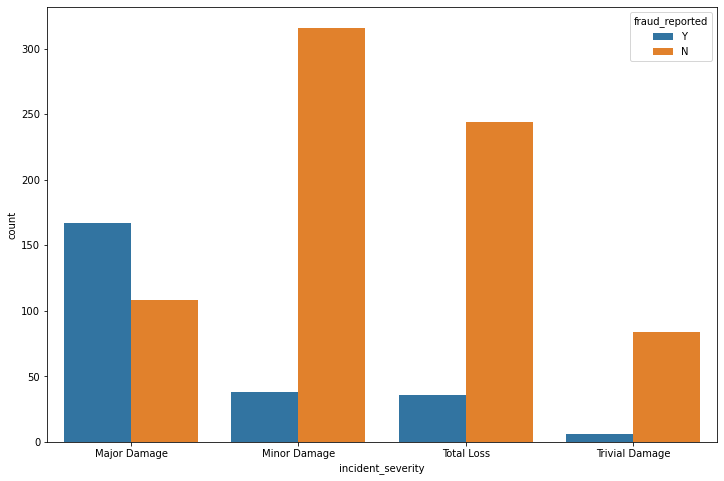

In [26]:
# cheking incident_severity and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_severity',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

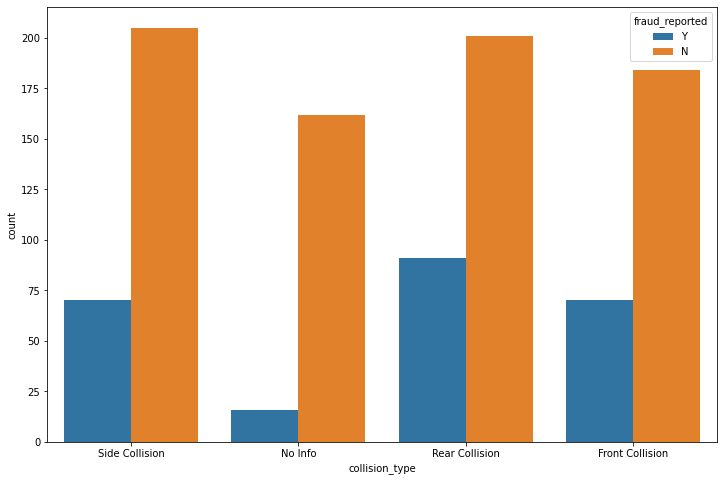

In [27]:
# cheking collision_type and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='collision_type',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

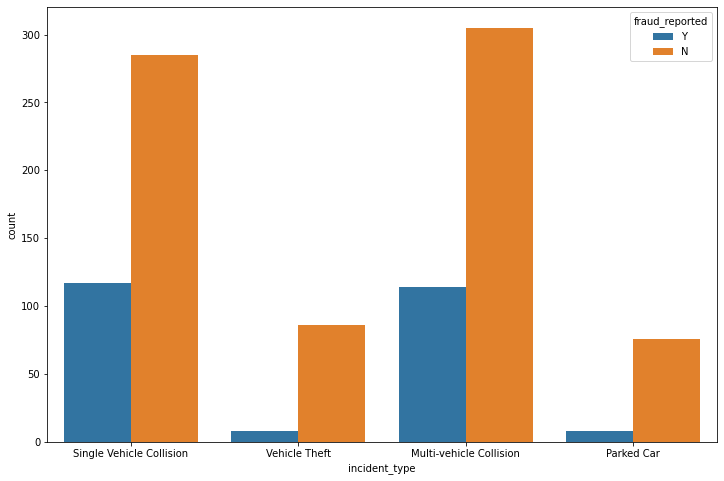

In [28]:
# cheking incident_type and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_type',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

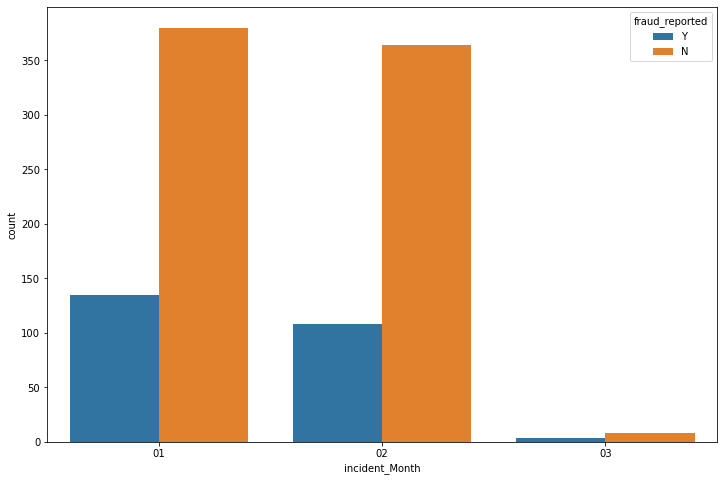

In [29]:
# cheking incident_Month and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='incident_Month',hue='fraud_reported', data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

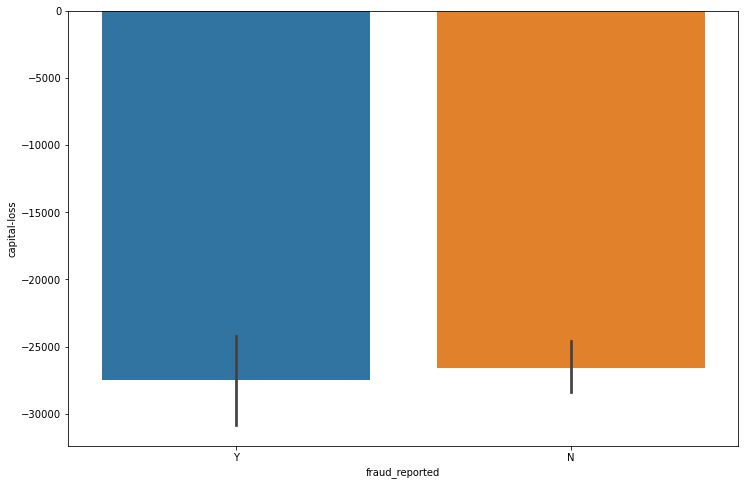

In [30]:
# cheking capital_loss and fraud_reported
plt.figure(figsize=(12,8))
sns.barplot(y='capital-loss',x='fraud_reported', data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

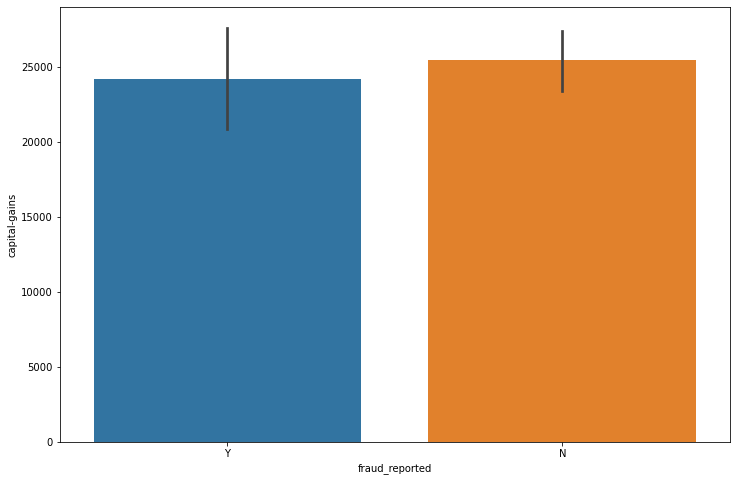

In [31]:
# cheking capital_gains and fraud_reported
plt.figure(figsize=(12,8))
sns.barplot(y='capital-gains',x='fraud_reported', data=df)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

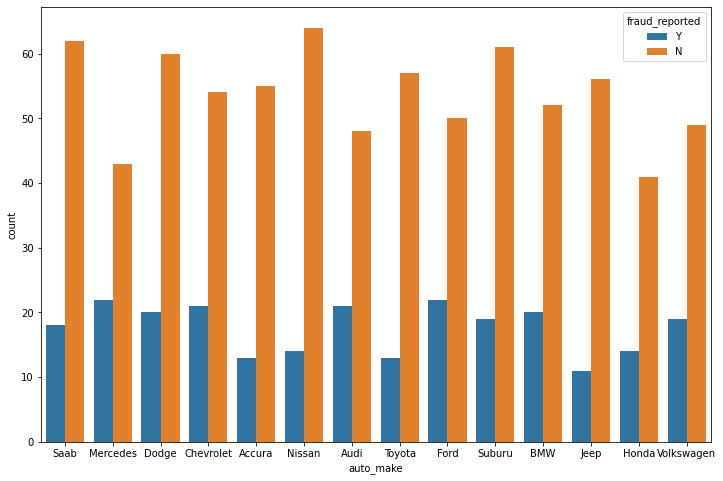

In [32]:
# cheking incident_Month and fraud_reported
plt.figure(figsize=(12,8))
sns.countplot(x='auto_make',hue='fraud_reported', data=df)

# Cheking for the skewness

In [33]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'incident_Date',
       'incident_Month', 'incident_Year', 'policy_bind_Date',
       'policy_bind_Month', 'policy_bind_Year'],
      dtype='object')

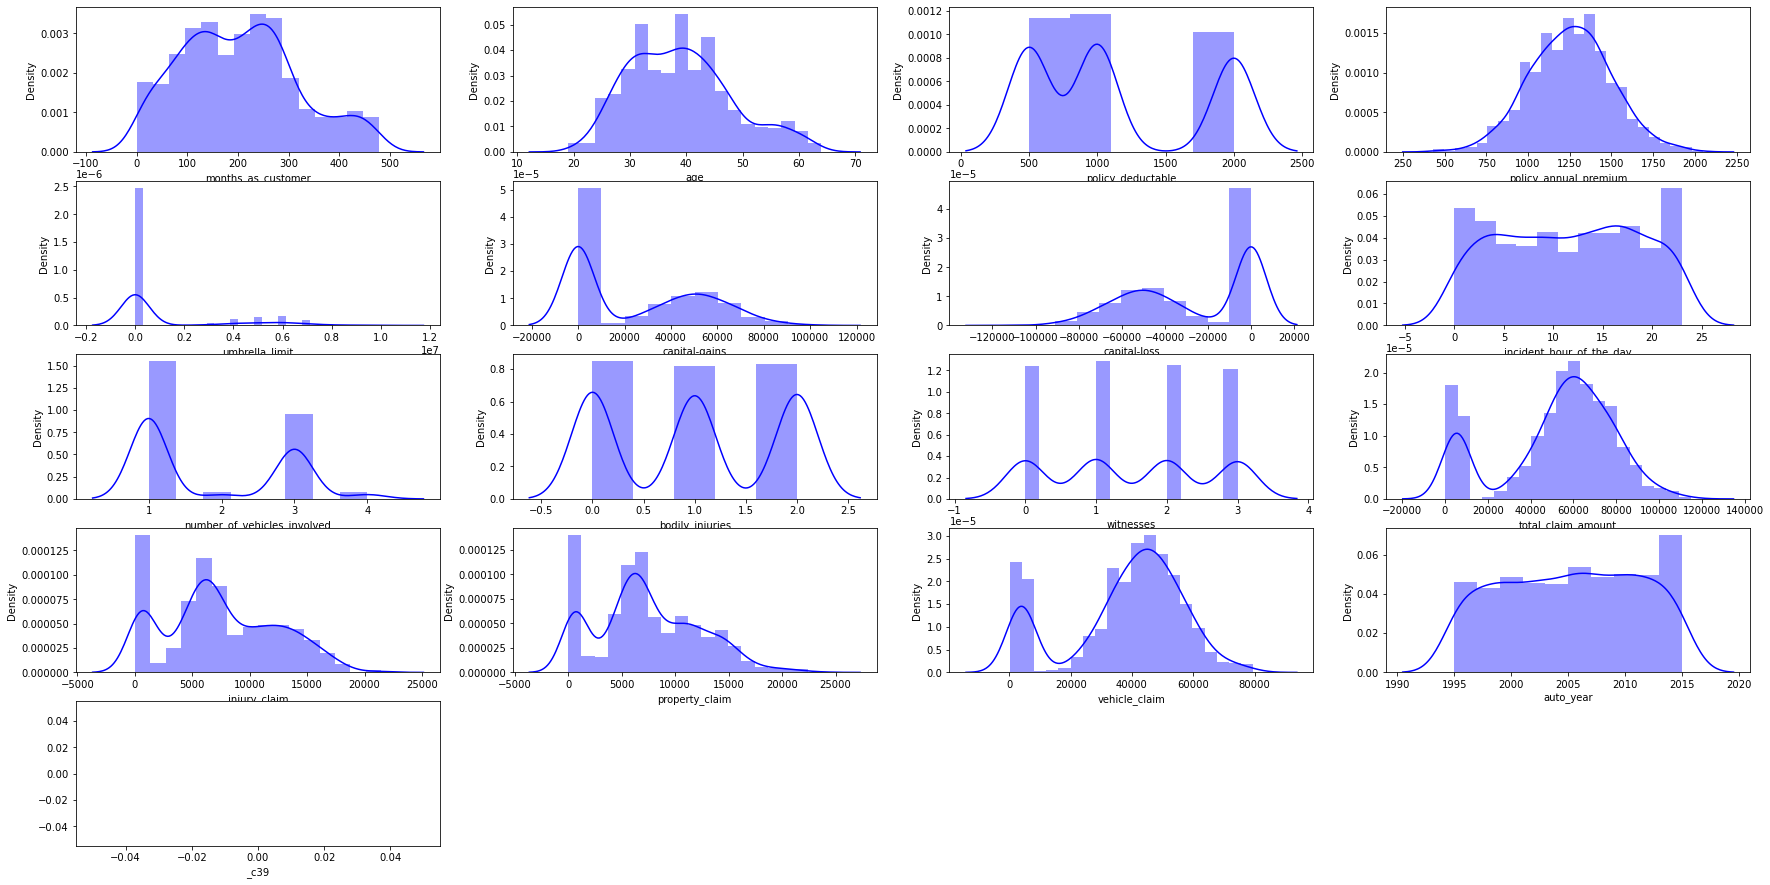

In [34]:
plt.figure(figsize=(30,25))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='blue')

In [35]:
df.select_dtypes(include=['int64','float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
_c39                                NaN
dtype: float64

here umbrella_limit,vehicle_claim and total_claim_amount have skewness 

# removing skewness using yeo-johnson method

In [36]:
from sklearn.preprocessing import power_transform
df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
#encoding categorical column in to numeric 
le = LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64','float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_bind_date             999 non-null    int32  
 3   policy_state                 999 non-null    int32  
 4   policy_csl                   999 non-null    int32  
 5   policy_deductable            999 non-null    int64  
 6   policy_annual_premium        999 non-null    float64
 7   umbrella_limit               999 non-null    float64
 8   insured_sex                  999 non-null    int32  
 9   insured_education_level      999 non-null    int32  
 10  insured_occupation           999 non-null    int32  
 11  insured_hobbies              999 non-null    int32  
 12  insured_relationship         999 non-null    int32  
 13  capital-gains       

# Seprating the Dependent and Independent variables

In [39]:
x = df.drop("fraud_reported",axis=1)
y = df["fraud_reported"]

In [40]:
x.shape

(999, 42)

In [41]:
x

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,auto_make,auto_model,auto_year,_c39,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,531,2,1,1000,1406.91,-0.501876,1,4,...,10,1,2004,NaN,24,0,0,16,9,24
1,228,42,820,1,1,2000,1197.22,1.992256,1,4,...,8,12,2007,NaN,20,0,0,26,5,16
2,134,29,185,2,0,2000,1413.14,1.992256,0,6,...,4,30,2007,NaN,21,1,0,5,8,10
3,256,41,765,0,1,2000,1415.74,1.993445,0,6,...,3,34,2014,NaN,9,0,0,24,4,0
4,228,44,180,0,2,1000,1583.91,1.993445,1,0,...,0,31,2009,NaN,16,1,0,5,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,486,2,2,1000,1310.80,-0.501876,0,5,...,6,6,2006,NaN,21,1,0,15,6,1
996,285,41,128,0,0,1000,1436.79,-0.501876,0,6,...,13,28,2015,NaN,23,0,0,4,0,24
997,130,34,508,2,1,500,1383.49,1.988548,0,5,...,11,19,1996,NaN,22,0,0,16,1,13
998,458,62,572,0,2,2000,1356.92,1.992256,1,0,...,1,5,1998,NaN,25,1,0,17,10,21


In [42]:
x.drop(["_c39"],axis=1,inplace=True)

In [43]:
x

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,incident_Date,incident_Month,incident_Year,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,531,2,1,1000,1406.91,-0.501876,1,4,...,0.756106,10,1,2004,24,0,0,16,9,24
1,228,42,820,1,1,2000,1197.22,1.992256,1,4,...,-1.786299,8,12,2007,20,0,0,26,5,16
2,134,29,185,2,0,2000,1413.14,1.992256,0,6,...,-0.820213,4,30,2007,21,1,0,5,8,10
3,256,41,765,0,1,2000,1415.74,1.993445,0,6,...,0.679910,3,34,2014,9,0,0,24,4,0
4,228,44,180,0,2,1000,1583.91,1.993445,1,0,...,-1.739726,0,31,2009,16,1,0,5,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,486,2,2,1000,1310.80,-0.501876,0,5,...,1.262302,6,6,2006,21,1,0,15,6,1
996,285,41,128,0,0,1000,1436.79,-0.501876,0,6,...,1.908849,13,28,2015,23,0,0,4,0,24
997,130,34,508,2,1,500,1383.49,1.988548,0,5,...,0.779673,11,19,1996,22,0,0,16,1,13
998,458,62,572,0,2,2000,1356.92,1.992256,1,0,...,-0.102905,1,5,1998,25,1,0,17,10,21


In [44]:
y.shape

(999,)

In [45]:
#Standard Scalarization
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x= sc.fit_transform(x)

# Imbalanced learn

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

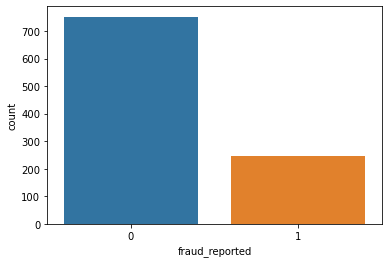

In [46]:
sns.countplot(x='fraud_reported', data=df)

In [51]:
from imblearn.over_sampling import BorderlineSMOTE
xr,yr = BorderlineSMOTE().fit_resample(x,y)
print('original target dataset shape:',y.shape)
print('resample target dataset shape:',yr.shape)

original target dataset shape: (999,)
resample target dataset shape: (1504,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

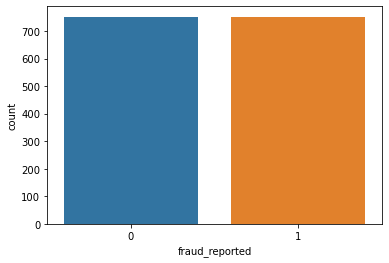

In [52]:
sns.countplot(yr)

Now we can see our dataset is balanced

# Modelling

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xr,yr,test_size=.27, random_state=42)
 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# LogistcRegression

In [55]:
LR = LogisticRegression()
LR_score = cross_val_score(LR,xr,yr,cv=5,scoring='accuracy')
print("cross val score:",np.mean(LR_score))

cross val score: 0.7467065337763013


In [56]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(x_train,y_train)
LR_predicted = LR.predict(x_test)
print(confusion_matrix(y_test, LR_predicted))
print(classification_report(y_test, LR_predicted))
print(accuracy_score(y_test, LR_predicted))

[[147  45]
 [ 48 167]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       192
           1       0.79      0.78      0.78       215

    accuracy                           0.77       407
   macro avg       0.77      0.77      0.77       407
weighted avg       0.77      0.77      0.77       407

0.7714987714987716


# KN Classifier

In [57]:
knn = KNeighborsClassifier()
knn_score = cross_val_score(knn,xr,yr,cv=5,scoring='accuracy')
print("cross val score:",np.mean(knn_score))

cross val score: 0.6462635658914729


In [58]:
knn.fit(x_train,y_train)
knn_predicted = knn.predict(x_test)
print(confusion_matrix(y_test, knn_predicted))
print(classification_report(y_test, knn_predicted))
print(accuracy_score(y_test, knn_predicted))

[[ 72 120]
 [  4 211]]
              precision    recall  f1-score   support

           0       0.95      0.38      0.54       192
           1       0.64      0.98      0.77       215

    accuracy                           0.70       407
   macro avg       0.79      0.68      0.66       407
weighted avg       0.78      0.70      0.66       407

0.6953316953316954


# Random Forest Classifier

In [59]:
RFC = RandomForestClassifier()
RFC_score = cross_val_score(RFC,xr,yr,cv=5,scoring='accuracy')
print("cross val score:",np.mean(RFC_score))

cross val score: 0.8710586932447397


In [60]:
RFC.fit(x_train,y_train)
RFC_predicted = RFC.predict(x_test)
print(confusion_matrix(y_test, RFC_predicted))
print(classification_report(y_test, RFC_predicted))
print(accuracy_score(y_test, RFC_predicted))

[[172  20]
 [ 34 181]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       192
           1       0.90      0.84      0.87       215

    accuracy                           0.87       407
   macro avg       0.87      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407

0.8673218673218673


# Ensemble Techniques

# AdaBoost Classifier

In [61]:
adb = AdaBoostClassifier()
adb_score = cross_val_score(adb,xr,yr,cv=5,scoring='accuracy')
print("cross val score:",np.mean(adb_score))

cross val score: 0.8457940199335547


In [62]:
adb.fit(x_train,y_train)
adb_predicted = adb.predict(x_test)
print(confusion_matrix(y_test, adb_predicted))
print(classification_report(y_test, adb_predicted))
print(accuracy_score(y_test, adb_predicted))

[[175  17]
 [ 32 183]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       192
           1       0.92      0.85      0.88       215

    accuracy                           0.88       407
   macro avg       0.88      0.88      0.88       407
weighted avg       0.88      0.88      0.88       407

0.8796068796068796


# Bagging Classifier

In [63]:
bgc = BaggingClassifier()
bgc_score = cross_val_score(bgc,xr,yr,cv=5,scoring='accuracy')
print("cross val score:",np.mean(bgc_score))

cross val score: 0.8697098560354375


In [64]:
bgc.fit(x_train,y_train)
bgc_predicted = bgc.predict(x_test)
print(confusion_matrix(y_test, bgc_predicted))
print(classification_report(y_test, bgc_predicted))
print(accuracy_score(y_test, bgc_predicted))

[[166  26]
 [ 26 189]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       192
           1       0.88      0.88      0.88       215

    accuracy                           0.87       407
   macro avg       0.87      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407

0.8722358722358723


# Gradient Boosting Classifier

In [65]:
gbc = GradientBoostingClassifier()
gbc_score = cross_val_score(gbc,xr,yr,cv=5,scoring='accuracy')
print("cross val score:",np.mean(gbc_score))

cross val score: 0.8750431893687708


In [66]:
gbc.fit(x_train,y_train)
gbc_predicted = bgc.predict(x_test)
print(confusion_matrix(y_test, gbc_predicted))
print(classification_report(y_test, gbc_predicted))
print(accuracy_score(y_test, gbc_predicted))

[[166  26]
 [ 26 189]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       192
           1       0.88      0.88      0.88       215

    accuracy                           0.87       407
   macro avg       0.87      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407

0.8722358722358723


so we will get Gradient Boosting classifier for final model

# Hyperparameter tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
#Gradient Boosting classifier
gbc = GradientBoostingClassifier()
parameters = {'criterion':['mse','mae'],
             'n_estimators':[100,200],
             'learning_rate':[0.1,0.5,1.0],
            'random_state':[5]}

In [69]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [70]:
best_param={'criterion':['mse'],
             'n_estimators':[100],
             'learning_rate':[0.5],
            'random_state':[5]}

In [71]:
best_GCV = GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [72]:
best_GCV.fit(x_train,y_train)
best_GCV_pred=best_GCV.best_estimator_.predict(x_test)
print("Accuracy After parameter tuning::",accuracy_score(y_test,best_GCV_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy After parameter tuning:: 0.9017199017199017


as we can see accuracy is increased

# Report of GradientBoostingClassifier

In [73]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_GCV_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       192
           1       0.90      0.92      0.91       215

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407



<AxesSubplot:>

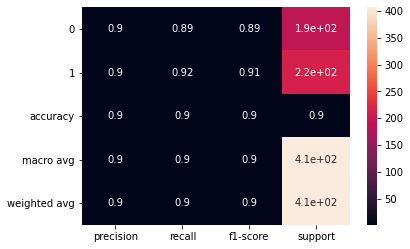

In [74]:
classification_rep = classification_report(y_test,best_GCV_pred,output_dict=True)
sns.heatmap(pd.DataFrame(classification_rep).T, annot=True)

In [75]:
from sklearn.metrics import roc_auc_score , roc_curve
print("roc auc score::",roc_auc_score(y_test, best_GCV_pred))

roc auc score:: 0.9008478682170542


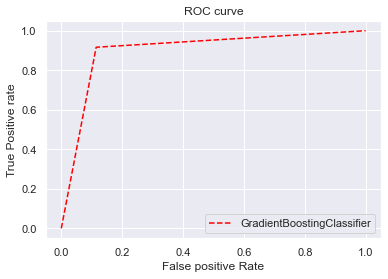

In [76]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_GCV_pred,pos_label=1)
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='GradientBoostingClassifier')
plt.title('ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Saving model

In [77]:
import joblib
joblib.dump(best_GCV.best_estimator_,"insuaranceclaim_fraudprediction.pkl")

['insuaranceclaim_fraudprediction.pkl']